# Breast Tumor Classification using our custom model

### This below two cell must be executed to access data from drive (if it's stored on it ), if you want run it on Google Colab

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
cd drive/

/content/drive


## Actual classifiaction code starts from here

In [0]:
import os

In [0]:
base_dir = '/content/drive/CV_dataset/'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [6]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Model Architecture

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(320, 320, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])



## Augmenting images on the training data

In [11]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(320, 320),batch_size=8,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(test_dir,target_size=(320, 320),batch_size=8,class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=25,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=10)

Found 179 images belonging to 2 classes.
Found 169 images belonging to 2 classes.
Epoch 1/50
25/25 [==============================] - 25s 982ms/step - loss: 0.7132 - acc: 0.5295 - val_loss: 0.6891 - val_acc: 0.5250
Epoch 2/50
25/25 [==============================] - 8s 337ms/step - loss: 0.6713 - acc: 0.5866 - val_loss: 0.6567 - val_acc: 0.6000
Epoch 3/50
25/25 [==============================] - 9s 375ms/step - loss: 0.6628 - acc: 0.5631 - val_loss: 0.6871 - val_acc: 0.6000
Epoch 4/50
25/25 [==============================] - 10s 390ms/step - loss: 0.6714 - acc: 0.5850 - val_loss: 0.6544 - val_acc: 0.6250
Epoch 5/50
25/25 [==============================] - 11s 423ms/step - loss: 0.6517 - acc: 0.6216 - val_loss: 0.6739 - val_acc: 0.6125
Epoch 6/50
25/25 [==============================] - 10s 388ms/step - loss: 0.6463 - acc: 0.6166 - val_loss: 0.7149 - val_acc: 0.6125
Epoch 7/50
21/25 [========================>.....] - ETA: 1s - loss: 0.6519 - acc: 0.617125/25 [===========================

## Plotting the Training & Validation accuracy and loss values

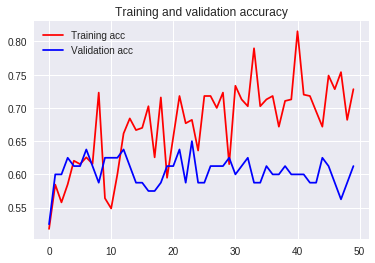

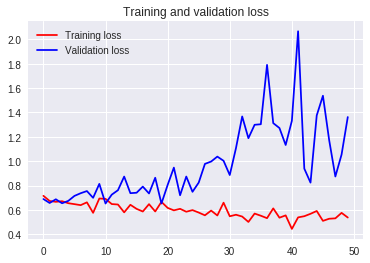

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Saving the trained model

In [0]:
model.save('cancer_classification_final_model.h5')